<a href="https://colab.research.google.com/github/PiotrMaciejKowalski/BigData2022-actors/blob/CU-30u4v4d_Analiza-wizualizacja/colabs/Wizualizacje_analiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Załadowanie repozytorium

##Załadowanie repozytorium

In [4]:
!git clone https://github.com/PiotrMaciejKowalski/BigData2022-actors.git

fatal: destination path 'BigData2022-actors' already exists and is not an empty directory.


In [5]:
!mv /content/BigData2022-actors/* .

##Testujemy dostępność metod z katalogu tests

In [6]:
from tests.simple_test import *

In [7]:
test_check_if_pytest_works()

#Setup sparka

##Setup sparka

In [8]:
!pip install pyspark py4j
!pip install -q findspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget ftp://ftp.ps.pl/pub/apache/spark/spark-3.3.1/spark-3.3.1-bin-hadoop2.tgz
!tar xf spark-3.3.1-bin-hadoop2.tgz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyspark-3.3.1.tar.gz (281.4 MB)
     |████████████████████████████████| 200 kB 4.3 MB/s 
     |████████████████████████████████| 199 kB 50.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=5498f588c031dcabaef1432c6506d0fa8cb14f24d39a21afaa4b7345073ad6e1
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
--2022-11-26 17:16:38--  ftp://ftp.ps.pl/pub/apache/spark/spark-3.3.1/spark-3.3.1-bin-hadoop2.tgz
           => ‘spark-3.3.1-bin-hadoop2.tgz.1’
Resolving ftp.ps.pl (ftp.ps.pl)... 212.14.28.36, 2001:4c58:62:2::36
Connecting to ftp.ps.pl (ftp.ps.pl)|212.14.28.36|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/apache/spark/spark-3.3.1 ... done.
==> SIZE spar

In [9]:
import pyspark
import findspark
from pyspark.sql import SparkSession
import os

In [10]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop2"
spark=SparkSession.builder.appName('Colab').getOrCreate()
spark

#Pobranie danych

##Import danych

In [11]:
!wget https://datasets.imdbws.com/name.basics.tsv.gz
!wget https://datasets.imdbws.com/title.akas.tsv.gz
!wget https://datasets.imdbws.com/title.basics.tsv.gz
!wget https://datasets.imdbws.com/title.crew.tsv.gz
!wget https://datasets.imdbws.com/title.episode.tsv.gz
!wget https://datasets.imdbws.com/title.principals.tsv.gz
!wget https://datasets.imdbws.com/title.ratings.tsv.gz

--2022-11-26 17:18:19--  https://datasets.imdbws.com/name.basics.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 13.35.24.74, 13.35.24.124, 13.35.24.122, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|13.35.24.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236951880 (226M) [binary/octet-stream]
Saving to: ‘name.basics.tsv.gz’

name.basics.tsv.gz  100%[===================>] 225.97M  22.7MB/s    in 11s     

2022-11-26 17:18:32 (19.8 MB/s) - ‘name.basics.tsv.gz’ saved [236951880/236951880]

--2022-11-26 17:18:32--  https://datasets.imdbws.com/title.akas.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 13.35.24.74, 13.35.24.124, 13.35.24.122, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|13.35.24.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288688343 (275M) [binary/octet-stream]
Saving to: ‘title.akas.tsv.gz’

title.akas.tsv.gz   100%[===================>] 275.31M  21.8MB/s 

##Rozpakowanie danych

In [12]:
!gzip -dc /content/name.basics.tsv.gz > name.basics.csv
!gzip -dc /content/title.akas.tsv.gz > title.akas.csv
!gzip -dc /content/title.basics.tsv.gz > title.basic.csv
!gzip -dc /content/title.crew.tsv.gz > title.crew.csv
!gzip -dc /content/title.episode.tsv.gz > title.episode.csv
!gzip -dc /content/title.principals.tsv.gz > title.principals.csv
!gzip -dc /content/title.ratings.tsv.gz > title.ratings.csv

#Wczytanie danych

##Wczytajmy dane z rozpakowanych plików

In [13]:
df_name_basics=spark.read.option("header", "true").option("delimiter", "\t").csv('name.basics.csv' ) 
df_title_akas=spark.read.option("header","true").option("delimiter", "\t").csv('title.akas.csv')
df_title_basic=spark.read.option("header","true").option("delimiter", "\t").csv('title.basic.csv')
df_title_crew=spark.read.option("header","true").option("delimiter", "\t").csv('title.crew.csv')
df_title_episode=spark.read.option("header","true").option("delimiter","\t").csv('title.episode.csv')
df_title_principals=spark.read.option("header","true").option("delimiter","\t").csv('title.principals.csv')
df_title_ratings=spark.read.option("header","true").option("delimiter","\t").csv('title.ratings.csv')

##Wyświetlmy dane

In [14]:
df_name_basics.show(3)
df_title_akas.show(3)
df_title_basic.show(3)
df_title_crew.show(3)
df_title_episode.show(3)
df_title_principals.show(3)
df_title_ratings.show(3)

+---------+---------------+---------+---------+--------------------+--------------------+
|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+---------------+---------+---------+--------------------+--------------------+
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0031983,tt00504...|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0038355,tt00373...|
|nm0000003|Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0054452,tt00573...|
+---------+---------------+---------+---------+--------------------+--------------------+
only showing top 3 rows

+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|  titleId|ordering|               title|region|language|      types|   attributes|isOriginalTitle|
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|tt0000001|       1|          Карменсіта|    

# Złączenie istotnych kolumn

## Wybierzmy z tabel tylko istotne rekordy:
- df_title_basic: wybierzmy tylko rekordy z primaryProfession zawierającym "actor" lub "actress",
- df_title_principals: wybierzmy rekordy z category zawierającym "actor" lub "actress".

In [ ]:
df_name_basics_selected = df_name_basics.filter("primaryProfession like '%actor%' or primaryProfession like '%actress%'")
df_title_principals_selected = df_title_principals.filter((df_title_principals.category == "actor") | (df_title_principals.category == "actress"))

## Wybierzmy następujące kolumny z tabel:
- df_title_basic:
  - tconst (unikalny numer tytułu - potrzebne do złączenia tabel)
  - titleType (rodzaj tytułu, np. film, serial - można porównywać podobieństwo aktorów na podstawie tego w jakich typach produkcji grali)
  - originalTitle (tytuł produkcji - być może przyda się do analizy podobnych filmów)
  - isAdult (czy produkcja jest dla dorosłych - można wykorzystać do porównywania aktorów na podstawie tego czy grają głównie w produkcjach dla dorosłych)
  - startYear (data wypuszczenia produkcji - można wykorzystać do porównania epok filmów, w których grali aktorzy)
  - endYear (data zakończenia serii, w innych przypadkach \N - można wykorzystać do porównania epok filmów, w których grali aktorzy)
  - genres (gatunki - może posłużyć do porównania aktorów na podstawie tego, że grali w produkcjach o podobnych gatunkach)

- df_title_principals:
  - tconst (unikalny numer tytułu - potrzebne do złączenia tabel)
  - nconst (unikalny numer aktora - potrzebne do złączenia tabel)
  - category (kategoria pracy (actor/actress) - może posłużyć do porównania aktorów na podstawie takiej samej płci)
  - characters (postacie zagrane w produkcji - może posłużyć do porównania aktorów na podstawie podobnych granych postaci)

- df_name_basics:
  - nconst(unikalny numer aktora - potrzebne do złączenia tabel)
  - primaryName (imię i nazwisko aktora - potrzebne do wyświetlania aktora lub do odnajdywania go w bazie po imieniu i nazwisku)
  - knownForTitles (tytuły produkcji, z których znany jest aktor - może posłużyć do porównania aktorów na podstawie tych samych lub podobnych produkcji, z których są znani)

In [ ]:
df_title_basic_selected = df_title_basic.select(["tconst", "titleType", "originalTitle", "isAdult", "startYear", "endYear", "genres"])
df_title_principals_selected = df_title_principals_selected.select(["tconst", "nconst", "category", "characters"])
df_name_basics_selected = df_name_basics_selected.select(["nconst", "primaryName", "knownForTitles"])

# Złączmy tabele df_name_basics, df_title_principals i df_title_basic

In [ ]:
print("df_name_basics_selected dataframe size: ", (df_name_basics_selected.count(), len(df_name_basics_selected.columns)))
print("df_title_principals_selected dataframe size: ", (df_title_principals_selected.count(), len(df_title_principals_selected.columns)))
print("df_title_basic_selected dataframe size: ", (df_title_basic_selected.count(), len(df_title_basic_selected.columns)))
data = df_title_basic_selected.join(df_title_principals_selected, "tconst", "right")
print("joined dataframe size: ", (data.count(), len(data.columns)))
data = data.join(df_name_basics_selected, "nconst", "inner")
print("joined dataframe size: ", (data.count(), len(data.columns)))

# Wybierzmy przykładowe wiersze z końcowego dataframe'u

In [ ]:
sample = data.rdd.takeSample(False, 5)

In [ ]:
import pandas as pd
sample = pd.DataFrame(sample, columns = data.columns)
sample

# Wizualizacja - Analiza


In [15]:
df_name_basics.createOrReplaceTempView('Actors')

In [19]:
spark.sql('select* from Actors').show()
spark.sql("""select min(birthYear), max(deathYear) from Actors""").show()

+---------+-------------------+---------+---------+--------------------+--------------------+
|   nconst|        primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+-------------------+---------+---------+--------------------+--------------------+
|nm0000001|       Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0031983,tt00504...|
|nm0000002|      Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0038355,tt00373...|
|nm0000003|    Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0054452,tt00573...|
|nm0000004|       John Belushi|     1949|     1982|actor,soundtrack,...|tt0072562,tt00804...|
|nm0000005|     Ingmar Bergman|     1918|     2007|writer,director,a...|tt0083922,tt00509...|
|nm0000006|     Ingrid Bergman|     1915|     1982|actress,soundtrac...|tt0036855,tt00345...|
|nm0000007|    Humphrey Bogart|     1899|     1957|actor,soundtrack,...|tt0043265,tt00425...|
|nm0000008|      Marlon Brando|     1924|     2004|actor,sou

In [20]:
spark.sql("""select* from Actors where birthYear = 0004""").show()

+---------+------------------+---------+---------+-----------------+--------------------+
|   nconst|       primaryName|birthYear|deathYear|primaryProfession|      knownForTitles|
+---------+------------------+---------+---------+-----------------+--------------------+
|nm0784172|Lucio Anneo Seneca|     0004|     0065|           writer|tt0237666,tt09725...|
+---------+------------------+---------+---------+-----------------+--------------------+



In [28]:
type(spark.sql("""select deathYear from Actors where nconst = 'nm0000003'""").first()['deathYear'])

str

In [41]:
spark.sql("""select length(knownForTitles) from Actors""").show()

+----------------------+
|length(knownForTitles)|
+----------------------+
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
|                    39|
+----------------------+
only showing top 20 rows



In [51]:
spark.sql("""select* from Actors where nconst = 'nm0000003'""").first()['knownForTitles']
spark.sql("""select length("tt0054452,tt0057345,tt0056404,tt0049189") """).show()
spark.sql("""select length(knownForTitles) as Liczba_wystapien, count(*) from Actors group by length(knownForTitles) """).show()

+-----------------------------------------------+
|length(tt0054452,tt0057345,tt0056404,tt0049189)|
+-----------------------------------------------+
|                                             39|
+-----------------------------------------------+

+----------------+--------+
|Liczba_wystapien|count(1)|
+----------------+--------+
|              31|   59026|
|              40|  370227|
|              20|  210818|
|              19|  946781|
|              41|  174384|
|              43|   78185|
|               9| 4882912|
|              39| 1424039|
|              10|  992465|
|              29|  416830|
|              21|  147474|
|              32|   51503|
|              42|   99365|
|               2| 2141913|
|              30|  108759|
|              53|       3|
|              54|       1|
|              49|      10|
|              50|       5|
|              59|       1|
+----------------+--------+
only showing top 20 rows



In [46]:
wystapienia_df = spark.sql("""select (length(knownForTitles)+1)/(10) as Liczba_wystapien, count(*) from Actors group by length(knownForTitles) """).toPandas()

In [48]:
import matplotlib.pyplot as plt

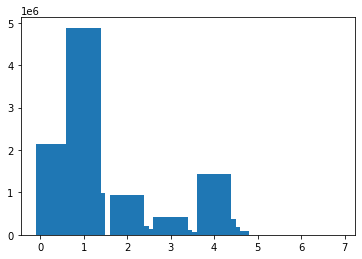

In [50]:
wystapienia_df.head(10)
plt.bar("Liczba_wystapien", "count(1)", data = wystapienia_df)
plt.show()